# SPRINT 13 T01 : Aprenentage Supervisat

## Nivell 1

### *Exercici 1 + Exercici 2:

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
retards_df = pd.read_csv('DelayedFlights.csv')

In [3]:
retards_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
retards_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

+ *Comprovades les variables que contenen null values, per tal de conservar el màxim d'observacions/dades que ofereix el 
   dataset; decideixo substituïr-los per la mean de cada una de les variables*

In [5]:
air_time_mean = retards_df['ArrTime'].mean()
retards_df['ArrTime'].fillna(air_time_mean, inplace=True)

In [6]:
retards_df['TailNum'].fillna(method ='pad', inplace = True)

In [7]:
aelaps_time_mean = retards_df['ActualElapsedTime'].mean()
retards_df['ActualElapsedTime'].fillna(air_time_mean, inplace=True)

In [8]:
crseelaps_time_mean = retards_df['CRSElapsedTime'].mean()
retards_df['CRSElapsedTime'].fillna(crseelaps_time_mean, inplace=True)

In [9]:
crseelaps_time_mean = retards_df['AirTime'].mean()
retards_df['AirTime'].fillna(crseelaps_time_mean, inplace=True)

In [10]:
arrdelay_time_mean = retards_df['ArrDelay'].mean()
retards_df['ArrDelay'].fillna(arrdelay_time_mean, inplace=True)

In [11]:
taxiin_time_mean = retards_df['TaxiIn'].mean()
retards_df['TaxiIn'].fillna(taxiin_time_mean, inplace=True)

In [12]:
taxiout_time_mean = retards_df['TaxiOut'].mean()
retards_df['TaxiOut'].fillna(taxiout_time_mean, inplace=True)

In [13]:
carrierdelay_time_mean = retards_df['CarrierDelay'].mean()
retards_df['CarrierDelay'].fillna(carrierdelay_time_mean, inplace=True)

In [14]:
weatherdelay_time_mean = retards_df['WeatherDelay'].mean()
retards_df['WeatherDelay'].fillna(weatherdelay_time_mean, inplace=True)

In [15]:
nasdelay_time_mean = retards_df['NASDelay'].mean()
retards_df['NASDelay'].fillna(nasdelay_time_mean, inplace=True)

In [16]:
securitydelay_time_mean = retards_df['SecurityDelay'].mean()
retards_df['SecurityDelay'].fillna(securitydelay_time_mean, inplace=True)

In [17]:
aircraftdelay_time_mean = retards_df['LateAircraftDelay'].mean()
retards_df['LateAircraftDelay'].fillna(aircraftdelay_time_mean, inplace=True)

In [18]:
retards_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.000000,0.000000,0.000000,0.000000,32.000000
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.000000,0.000000,0.000000,0.000000,22.000000
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.000000,57.000000,18.000000,0.000000,0.000000
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.000000,0.000000,19.000000,0.000000,79.000000
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *I comprovo que ja no hi ha cap null value*

In [19]:
retards_df.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [20]:
retards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

+ *Em desfaig de les columnes amb valors no numèrics, de "Unnamed: 0" que sembla un índex afegit al del DataFrame, de
   "Year" que és el mateix per totes les observacions (2008), i de "Cancelled" i "Diverted" que són variables categòriques 
    convertides i tractades de forma binaria(0, 1)*

In [21]:
retards_df.drop(retards_df.columns[[0, 1,  9, 11, 17, 18, 22, 23, 24]], axis = 1, inplace = True)

In [22]:
retards_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,...,-14.0,8.0,810,4.0,8.0,19.179399,3.703571,15.021635,0.090137,25.296466
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,...,2.0,19.0,810,5.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,...,14.0,8.0,515,3.0,17.0,19.179399,3.703571,15.021635,0.090137,25.296466
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,34.0,34.0,515,3.0,10.0,2.000000,0.000000,0.000000,0.000000,32.000000
4,1,3,4,1940.0,1915,2121.0,2110,378,101.0,115.0,...,11.0,25.0,688,4.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,1250.0,1220,1617.0,1552,1621,147.0,152.0,...,25.0,30.0,906,9.0,18.0,3.000000,0.000000,0.000000,0.000000,22.000000
1936754,12,13,6,657.0,600,904.0,749,1631,127.0,109.0,...,75.0,57.0,481,15.0,34.0,0.000000,57.000000,18.000000,0.000000,0.000000
1936755,12,13,6,1007.0,847,1149.0,1010,1631,162.0,143.0,...,99.0,80.0,689,8.0,32.0,1.000000,0.000000,19.000000,0.000000,79.000000
1936756,12,13,6,1251.0,1240,1446.0,1437,1639,115.0,117.0,...,9.0,11.0,533,13.0,13.0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *Defineixo una funció per generar els nous valors binaris de la columna"ArrDelay"*

In [23]:
def rating_arrivalDelay(x):
    if x > 0.0:
        return 1
    else:
        return 0

In [24]:
retards_df['ArrDelay'] = retards_df['ArrDelay'].apply(rating_arrivalDelay)

+ *Comprovo que només hi tinc o i 1 com  valos de la columna "ArrDelay" modificada*

In [25]:
retards_df['ArrDelay'].unique()

array([0, 1], dtype=int64)

+ *Quantifico les observacions de cada tipus que hi tenim*

In [26]:
retards_df['ArrDelay'].value_counts()

1    1731802
0     204956
Name: ArrDelay, dtype: int64

+ *I puc donar una orientació inicial en percentatge de quin és el "imbalance" del data set respecte la variable target que he definit*

In [27]:
print(retards_df['ArrDelay'].value_counts()/len(retards_df['ArrDelay']))

1    0.894176
0    0.105824
Name: ArrDelay, dtype: float64


+ *Del Data set original, en faig un random sample de 2000 observacions, per millor agilitat de l'ordinador*

In [28]:
# defineixo el sample size que vull
N = 2000

# genero una nou dataset amb el random sample estratificat
retards2_df = retards_df .groupby('ArrDelay', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(retards_df))))).sample(frac=1).reset_index(drop=True)

In [29]:
retards2_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,11,17,1,627.0,620,727.0,725,4121,120.0,125.0,...,1,7.0,612,6.0,13.0,19.179399,3.703571,15.021635,0.090137,25.296466
1,11,22,6,919.0,825,1155.0,1100,837,156.0,155.0,...,1,54.0,745,13.0,33.0,54.000000,0.000000,1.000000,0.000000,0.000000
2,1,14,1,648.0,630,845.0,850,3570,117.0,140.0,...,0,18.0,685,8.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466
3,7,21,1,1030.0,905,1218.0,1020,3511,108.0,75.0,...,1,85.0,337,5.0,11.0,0.000000,0.000000,112.000000,0.000000,6.000000
4,12,22,1,1935.0,1905,16.0,2359,2246,161.0,174.0,...,1,30.0,1242,6.0,15.0,10.000000,0.000000,0.000000,0.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6,30,1,801.0,730,932.0,845,127,91.0,75.0,...,1,31.0,267,13.0,15.0,0.000000,0.000000,47.000000,0.000000,0.000000
1996,3,7,5,1540.0,1325,1813.0,1541,5545,153.0,136.0,...,1,135.0,589,4.0,35.0,0.000000,135.000000,17.000000,0.000000,0.000000
1997,3,24,1,1214.0,1145,1252.0,1220,443,98.0,95.0,...,1,29.0,478,2.0,17.0,0.000000,0.000000,3.000000,0.000000,29.000000
1998,5,13,2,1507.0,1445,1556.0,1535,36,49.0,50.0,...,1,22.0,187,6.0,7.0,0.000000,0.000000,0.000000,0.000000,21.000000


+ *Divideixo el Data Set a (variables independents) i b (variable dependent), només per tenir variable target al final del 
   DataFrame*

In [30]:
a = retards2_df.drop("ArrDelay", 1)
b = retards2_df["ArrDelay"]

+ *I faig un "pd.concat()" per deixar el Data set amb la variable dependent "ArrDelay" al final a la dreta*

In [31]:
retards2_df = pd.concat([a, b], axis = 1)

In [32]:
retards2_df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay
0,11,17,1,627.0,620,727.0,725,4121,120.0,125.0,...,7.0,612,6.0,13.0,19.179399,3.703571,15.021635,0.090137,25.296466,1
1,11,22,6,919.0,825,1155.0,1100,837,156.0,155.0,...,54.0,745,13.0,33.0,54.000000,0.000000,1.000000,0.000000,0.000000,1
2,1,14,1,648.0,630,845.0,850,3570,117.0,140.0,...,18.0,685,8.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466,0
3,7,21,1,1030.0,905,1218.0,1020,3511,108.0,75.0,...,85.0,337,5.0,11.0,0.000000,0.000000,112.000000,0.000000,6.000000,1
4,12,22,1,1935.0,1905,16.0,2359,2246,161.0,174.0,...,30.0,1242,6.0,15.0,10.000000,0.000000,0.000000,0.000000,7.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6,30,1,801.0,730,932.0,845,127,91.0,75.0,...,31.0,267,13.0,15.0,0.000000,0.000000,47.000000,0.000000,0.000000,1
1996,3,7,5,1540.0,1325,1813.0,1541,5545,153.0,136.0,...,135.0,589,4.0,35.0,0.000000,135.000000,17.000000,0.000000,0.000000,1
1997,3,24,1,1214.0,1145,1252.0,1220,443,98.0,95.0,...,29.0,478,2.0,17.0,0.000000,0.000000,3.000000,0.000000,29.000000,1
1998,5,13,2,1507.0,1445,1556.0,1535,36,49.0,50.0,...,22.0,187,6.0,7.0,0.000000,0.000000,0.000000,0.000000,21.000000,1


In [33]:
retards2_df.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,6.136000,15.605500,4.012500,1508.108000,1466.604000,1611.463492,1629.679500,2076.867500,139.249492,135.325500,...,42.664000,773.096000,6.600345,18.330616,19.383648,3.344657,14.394116,0.074228,25.153856,0.894000
std,3.507371,8.809181,2.030371,456.704342,425.246517,544.941108,468.436724,1906.092282,114.809640,73.982872,...,51.072432,598.835702,4.587801,13.315249,33.245997,14.675835,24.628273,0.825343,33.644743,0.307915
min,1.000000,1.000000,1.000000,2.000000,30.000000,2.000000,1.000000,1.000000,28.000000,30.000000,...,6.000000,56.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,1206.000000,1135.000000,1322.000000,1330.000000,553.750000,80.000000,81.000000,...,12.000000,337.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.000000,16.000000,4.000000,1546.500000,1515.000000,1713.500000,1705.000000,1462.500000,116.000000,117.500000,...,24.000000,610.500000,5.000000,15.000000,19.179399,0.000000,15.021635,0.000000,25.296466,1.000000
75%,9.000000,23.000000,6.000000,1853.000000,1815.000000,2027.250000,2007.500000,3153.500000,165.000000,165.000000,...,52.000000,986.250000,8.000000,21.000000,19.179399,3.703571,15.021635,0.090137,25.296466,1.000000
max,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2359.000000,7813.000000,1610.140629,580.000000,...,436.000000,4502.000000,86.000000,131.000000,399.000000,318.000000,371.000000,22.000000,288.000000,1.000000


+ *Miro quants hi ha de cada tipus*

In [34]:
retards2_df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'ArrDelay'],
      dtype='object')

In [35]:
retards2_df['ArrDelay'].value_counts()

1    1788
0     212
Name: ArrDelay, dtype: int64

+ *I puc comprovar que el percentatge de cadascun dels valors, es manté deprés del sample estratificat*

In [36]:
print(retards2_df['ArrDelay'].value_counts()/len(retards2_df['ArrDelay']))

1    0.894
0    0.106
Name: ArrDelay, dtype: float64


+ *Divideixo el Data set entre variables independents i variable target*

In [37]:
X = retards2_df.drop("ArrDelay", 1)
y = retards2_df["ArrDelay"]

+ *I faig split d'acord amb lo anterior*

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

+ *Comprovo shapes són correctes*

In [39]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1400, 20) (600, 20) (1400,) (600,)


###  DECISION TREE CLASSIFIER

In [40]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

In [41]:
# Creem una instància de DecisionTreeClassifier()
dtclassif = DecisionTreeClassifier()

# Entrenem el model
dtclassif= dtclassif.fit(X_train,y_train)

#Fem la predicció del model sobre X_test
y_pred_dtc = dtclassif.predict(X_test)

In [42]:
# generem la matriu de confusió
confusion = metrics.confusion_matrix(y_test, y_pred_dtc)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 27  24]
 [ 33 516]]


In [43]:
# Calculem l'Accuracy : sobre el total de y_test, en quin percentatge el model encerta el valors amb Y_pred_dtc 

print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_dtc))

0.905
0.905


In [44]:
 # Classification Error : sobre el total de y_test, en quin percentatge el model NO encerta el valors amb Y_pred_dtc

classification_error = (FP + FN) / float(TP + TN + FP + FN) 

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_dtc))

0.095
0.09499999999999997


In [45]:
type(confusion)

numpy.ndarray

In [46]:
import seaborn as sns

<AxesSubplot:>

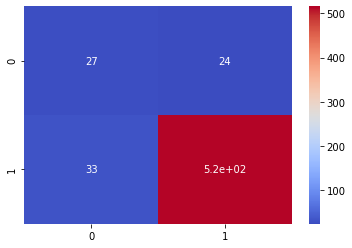

In [47]:
sns.heatmap(confusion, annot=True, cmap = 'coolwarm')

+ *El gràfic em donael valor de True Positive en notació científica*

   *Faig un print dels valors de cada posició de la confusion matrix ("confusion")*

In [48]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP))
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 27 False Negative = 33 True Positive = 516 False Positive  = 24


In [49]:
# Sensitivity / Recall : Quan el valor de Y_test és POSITIU, en quin percentatge la predicció és CORRECTE?

sensitivity = TP / float(FN + TP) 

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_dtc)) 

0.9398907103825137
0.9398907103825137


In [50]:
# Specificity : Quan el valor de Y_test és NEGATIU, en quin percentatge la predicció és CORRECTE?

specificity = TN / (TN + FP) 
print(specificity)

0.5294117647058824


In [51]:
# FPT (False Positive Rate): Quan el valor de Y_test és NEGATIU, en quin percentatge la predicció és INCORRECTE?
# FPT és doncs =  1 - Specificity

false_positive_rate = FP / float(TN + FP) 

print(false_positive_rate)
print(1 - specificity)

0.47058823529411764
0.47058823529411764


In [52]:
# Precision : Quan un valor POSITIU és predit, en quin percentatge aquesta predicció és CORRECTE?

precision = TP / float(TP + FP) 

print(precision)
print(metrics.precision_score(y_test, y_pred_dtc))

0.9555555555555556
0.9555555555555556


In [53]:
# F1 score : És un paràmetre d'evaluació del model que combina Precision i Recall

f1 = metrics.f1_score(y_test, y_pred_dtc)
f1

0.9476584022038568

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

print("Precision:",metrics.precision_score(y_test, y_pred_dtc))

print("Recall:",metrics.recall_score(y_test, y_pred_dtc))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_dtc)
print('F1 score = {}'.format(f1))

y_pred_dtc_proba = dtclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.905
Precision: 0.9555555555555556
Recall: 0.9398907103825137
FPR = 0.47058823529411764
F1 score = 0.9476584022038568
AUC = 0.734651237544198


In [55]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        51
           1       0.96      0.94      0.95       549

    accuracy                           0.91       600
   macro avg       0.70      0.73      0.72       600
weighted avg       0.91      0.91      0.91       600



+ *Obtenim les probabilitats de y_pred per dibuixar la curva ROC*

  *I el valor associat de AUC (area under the curve)*

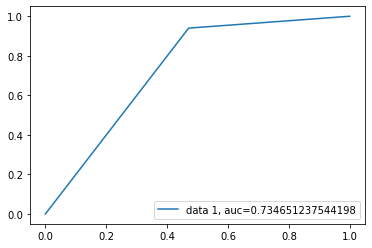

In [56]:
y_pred_dtc_proba = dtclassif.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
auc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

###  LOGISTIC REGRESSION


In [57]:

from sklearn.linear_model import LogisticRegression


lgrclassif = LogisticRegression()


lgrclassif.fit(X_train,y_train)


y_pred_lgr = lgrclassif.predict(X_test)

C:\Users\Enric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lgr)
print(cnf_matrix)

TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

[[ 43   8]
 [  8 541]]


Text(0.5, 257.44, 'Predicted label')

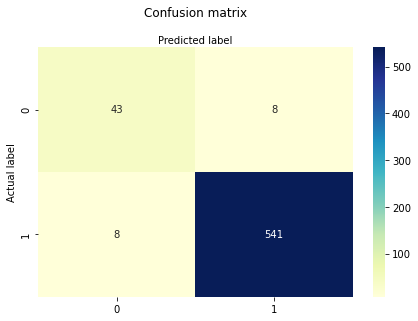

In [59]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [60]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP))
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 43 False Negative = 8 True Positive = 541 False Positive  = 8


In [61]:
print(metrics.recall_score(y_test, y_pred_dtc)) # Sensitivity = Recall

0.9398907103825137


In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgr))
print("Precision:",metrics.precision_score(y_test, y_pred_lgr))
print("Recall:",metrics.recall_score(y_test, y_pred_lgr))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_lgr)
print('F1 score = {}'.format(f1))

y_pred_lgr_proba = lgrclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_lgr_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.9733333333333334
Precision: 0.9854280510018215
Recall: 0.9854280510018215
FPR = 0.1568627450980392
F1 score = 0.9854280510018215
AUC = 0.9928568877459909


In [63]:
print(metrics.classification_report(y_test, y_pred_lgr))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        51
           1       0.99      0.99      0.99       549

    accuracy                           0.97       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.97      0.97      0.97       600



+ *Obtenim les probabilitats de y_pred per dibuixar la curva ROC*

  *I el valor associat de AUC (area under the curve)*

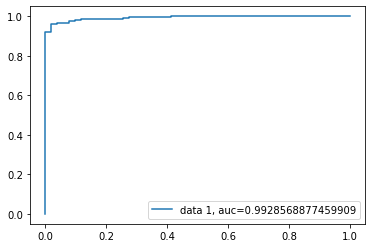

In [64]:
y_pred_lgr_proba = lgrclassif.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_lgr_proba)
auc = metrics.roc_auc_score(y_test, y_pred_lgr_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### KN NEAREST NEIGHBORS

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knclassif = KNeighborsClassifier(n_neighbors=5)
knclassif.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
y_pred_kn = knclassif.predict(X_test)

In [67]:
confus_kn = metrics.confusion_matrix(y_test, y_pred_kn)
print(confus_kn)

[[  4  47]
 [  5 544]]


Text(0.5, 257.44, 'Predicted label')

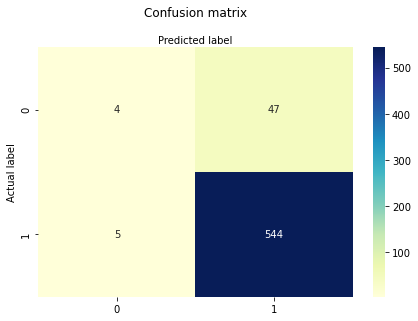

In [68]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confus_kn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
TP = confus_kn[1, 1]
TN = confus_kn[0, 0]
FP = confus_kn[0, 1]
FN = confus_kn[1, 0]

In [70]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP) )
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 4 False Negative = 5 True Positive = 544 False Positive  = 47


In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_kn))
print("Precision:",metrics.precision_score(y_test, y_pred_kn))
print("Recall:",metrics.recall_score(y_test, y_pred_kn))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_kn)
print('F1 score = {}'.format(f1))

y_pred_kn_proba = knclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_kn_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.9133333333333333
Precision: 0.9204737732656514
Recall: 0.9908925318761385
FPR = 0.9215686274509803
F1 score = 0.9543859649122807
AUC = 0.6126647380263581


In [72]:
print(metrics.classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.44      0.08      0.13        51
           1       0.92      0.99      0.95       549

    accuracy                           0.91       600
   macro avg       0.68      0.53      0.54       600
weighted avg       0.88      0.91      0.88       600



+ *Obtenim les probabilitats de y_pred per dibuixar la curva ROC*

  *I el valor associat de AUC (area under the curve)*

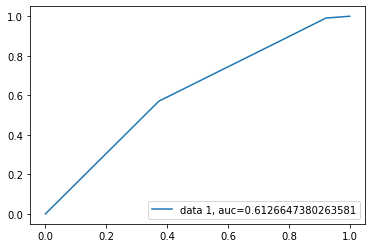

In [73]:
y_pred_kn_proba = knclassif.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_kn_proba)
auc = metrics.roc_auc_score(y_test, y_pred_kn_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### RESUM COMPARATIU TRES METODES


+ Decission Tree Classifier:  

True Negative = 27 False Negative = 33 True Positive = 516 False Positive  = 24    

Accuracy: 0.905

Precision: 0.9555555555555556

Recall: 0.9398907103825137

FPR = 0.47058823529411764

F1 score = 0.9476584022038568

AUC = 0.734651237544198

+ Logistic Regression:

True Negative = 43 False Negative = 8 True Positive = 541 False Positive  = 8

Accuracy: 0.9733333333333334

Precision: 0.9854280510018215

Recall: 0.9854280510018215

FPR = 0.1568627450980392

F1 score = 0.9854280510018215

AUC = 0.9928568877459909

+ Kn nearest neighbors :

True Negative = 4 False Negative = 5 True Positive = 544 False Positive  = 47

Accuracy: 0.9133333333333333

Precision: 0.9204737732656514

Recall: 0.9908925318761385

FPR = 0.9215686274509803

F1 score = 0.9543859649122807

AUC = 0.6126647380263581




### *Exercici 3*

Entrena’ls utilitzant els diferents paràmetres que admeten.

+ * 1.- DECISION TREE CLASSIFIER : criterion = "entropy" i max_depth = 3*

In [74]:
dtclassif = DecisionTreeClassifier(criterion="entropy", max_depth=3)

dtclassif= dtclassif.fit(X_train,y_train)

y_pred_dtc = dtclassif.predict(X_test)

In [75]:
confusion = metrics.confusion_matrix(y_test, y_pred_dtc)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[  0  51]
 [  0 549]]


In [76]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP) )
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 0 False Negative = 0 True Positive = 549 False Positive  = 51


In [77]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

print("Precision:",metrics.precision_score(y_test, y_pred_dtc))

print("Recall:",metrics.recall_score(y_test, y_pred_dtc))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_dtc)
print('F1 score = {}'.format(f1))

y_pred_dtc_proba = dtclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.915
Precision: 0.915
Recall: 1.0
FPR = 1.0
F1 score = 0.9556135770234987
AUC = 0.8799778563520126


+ *2.- DECISION TREE CLASSIFIER : criterion = "entropy", spplitter = "random" i max_depth = 3*

In [78]:

dtclassif = DecisionTreeClassifier(criterion="entropy", splitter = "random", max_depth=3)


dtclassif= dtclassif.fit(X_train,y_train)


y_pred_dtc = dtclassif.predict(X_test)

In [79]:
confusion = metrics.confusion_matrix(y_test, y_pred_dtc)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[  0  51]
 [  0 549]]


In [80]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP) )
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 0 False Negative = 0 True Positive = 549 False Positive  = 51


In [81]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

print("Precision:",metrics.precision_score(y_test, y_pred_dtc))

print("Recall:",metrics.recall_score(y_test, y_pred_dtc))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_dtc)
print('F1 score = {}'.format(f1))

y_pred_dtc_proba = dtclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.915
Precision: 0.915
Recall: 1.0
FPR = 1.0
F1 score = 0.9556135770234987
AUC = 0.847958855673417


+ *3.- DECISION TREE CLASSIFIER : max_depth = 4*

In [82]:

dtclassif = DecisionTreeClassifier(max_depth=4)


dtclassif= dtclassif.fit(X_train,y_train)


y_pred_dtc = dtclassif.predict(X_test)

In [83]:
confusion = metrics.confusion_matrix(y_test, y_pred_dtc)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[  6  45]
 [ 17 532]]


In [84]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP) )
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 6 False Negative = 17 True Positive = 532 False Positive  = 45


In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

print("Precision:",metrics.precision_score(y_test, y_pred_dtc))

print("Recall:",metrics.recall_score(y_test, y_pred_dtc))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_dtc)
print('F1 score = {}'.format(f1))

y_pred_dtc_proba = dtclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.8966666666666666
Precision: 0.9220103986135182
Recall: 0.9690346083788707
FPR = 0.8823529411764706
F1 score = 0.9449378330373001
AUC = 0.8667630986820958


In [86]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

+ *I visualitzem el decision tree d'acord amb l'últim tuning que ha donat la millor AUC*

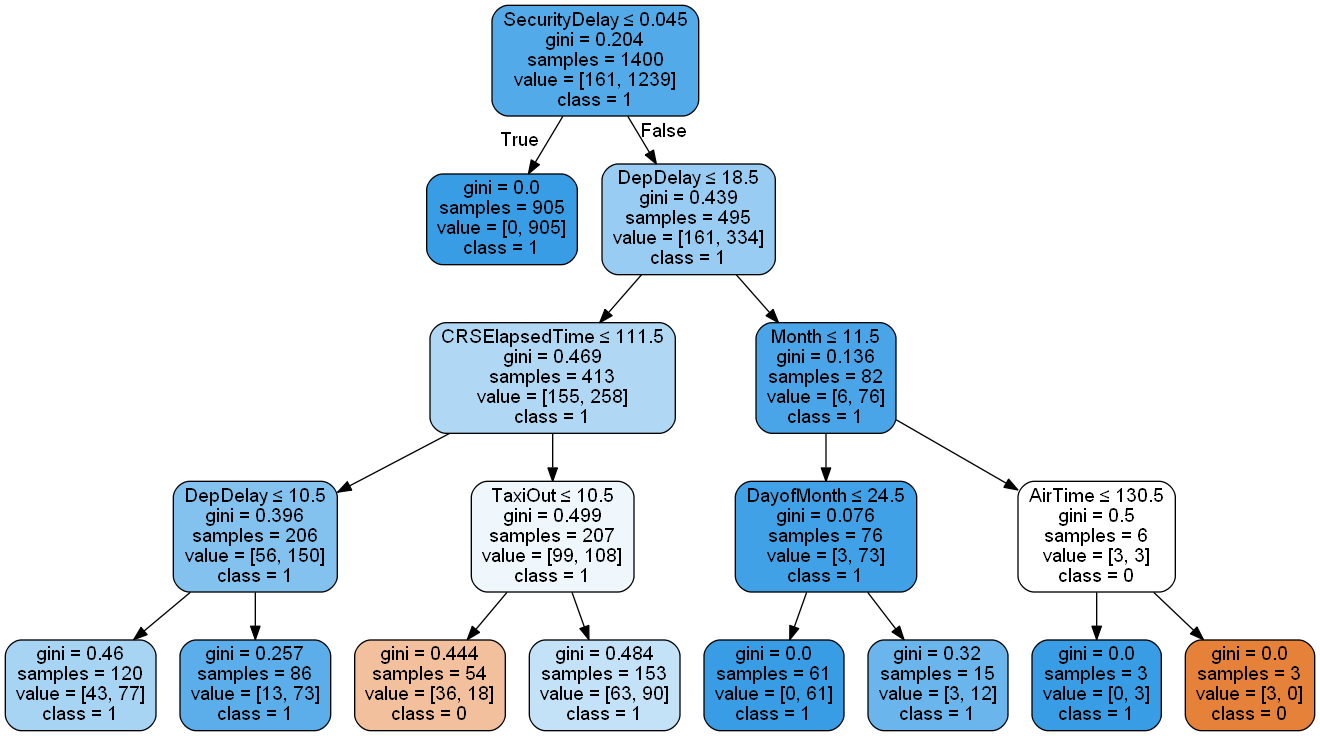

In [87]:
feature_cols = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


dot_data = StringIO()
export_graphviz(dtclassif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ArrDelay.png')
Image(graph.create_png())

### RESUM COMPARATIU TRES MODELS AMB DECISSION TREE


+ *1.- DECISION TREE CLASSIFIER : criterion = "entropy" i max_depth = 3*  

True Negative = 0 False Negative = 0 True Positive = 549 False Positive  = 51 

Accuracy: 0.915

Precision: 0.915

Recall: 1.0

FPR = 1.0

F1 score = 0.9556135770234987

AUC = 0.8799778563520126

+ *2.- DECISION TREE CLASSIFIER : criterion = "entropy", spplitter = "random" i max_depth = 3*

True Negative = 0 False Negative = 0 True Positive = 549 False Positive  = 51

Accuracy: 0.915

Precision: 0.915

Recall: 1.0

FPR = 1.0

F1 score = 0.9556135770234987

AUC = 0.847958855673417


+ *3.- DECISION TREE CLASSIFIER : max_depth = 4*

True Negative = 6 False Negative = 17 True Positive = 532 False Positive  = 45

Accuracy: 0.8966666666666666

Precision: 0.9220103986135182

Recall: 0.9690346083788707

FPR = 0.8823529411764706

F1 score = 0.9449378330373001

AUC = 0.8667630986820958



+ *4.- LOGISTIC REGRESSION : Farem servir GridSearchCV 

In [88]:

from sklearn.linear_model import LogisticRegression


lgrclassif = LogisticRegression()

param_grid = [
    {'penalty': ['l1', 'l2','elasticnet', 'none'],
    'C' : [0.6, 0.1, 0.01],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 1500]
    }
]

# fit the model with data
lgrclassif.fit(X_train,y_train)

#
y_pred_lgr = lgrclassif.predict(X_test)

C:\Users\Enric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
clf = GridSearchCV(lgrclassif, param_grid = param_grid, cv = 3, verbose = False)

In [91]:
best_clf = clf.fit(X_test, y_pred_lgr)

C:\Users\Enric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Enric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Enric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Enric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Enric\anaconda3\lib\site-packages\sklearn\model_selection\_v

In [92]:
best_clf.best_estimator_

LogisticRegression(C=0.6, penalty='none', solver='newton-cg')

In [93]:
best_clf.score(X_test, y_pred_lgr)

1.0

In [94]:
print('Accuracy : {}'.format(best_clf.score(X_test, y_pred_lgr)))

Accuracy : 1.0


In [95]:
y_test

674     1
1699    1
1282    1
1315    1
1210    0
       ..
1382    1
1371    1
854     1
995     0
1497    1
Name: ArrDelay, Length: 600, dtype: int64

In [96]:
# save confusion matrix and slice into four pieces
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lgr)
print(cnf_matrix)
#[row, column]
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]

[[ 43   8]
 [  8 541]]


Text(0.5, 257.44, 'Predicted label')

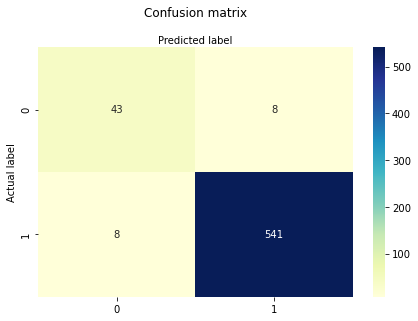

In [97]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [98]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP) )
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 43 False Negative = 8 True Positive = 541 False Positive  = 8


In [99]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lgr))
print("Precision:",metrics.precision_score(y_test, y_pred_lgr))
print("Recall:",metrics.recall_score(y_test, y_pred_lgr))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_lgr)
print('F1 score = {}'.format(f1))

y_pred_lgr_proba = lgrclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_lgr_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.9733333333333334
Precision: 0.9854280510018215
Recall: 0.9854280510018215
FPR = 0.1568627450980392
F1 score = 0.9854280510018215
AUC = 0.9928568877459909


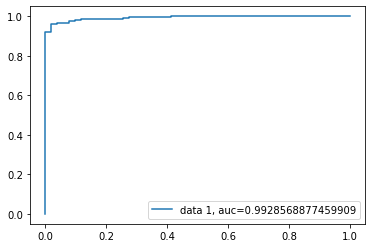

In [100]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_lgr_proba)
auc = metrics.roc_auc_score(y_test, y_pred_lgr_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### RESUM COMPARATIU LOGISTIC REGRESSION :

LOGISTIC REGRESSION (all parameters by Default):

True Negative = 43 False Negative = 8 True Positive = 541 False Positive  = 8

Accuracy: 0.9733333333333334

Precision: 0.9854280510018215

Recall: 0.9854280510018215

FPR = 0.1568627450980392

F1 score = 0.9854280510018215

AUC = 0.9928568877459909


LOGISTIC REGRESSION amb GridSearchCV - LogisticRegression(C=0.6, penalty='none', solver='newton-cg')-:

True Negative = 43 False Negative = 8 True Positive = 541 False Positive  = 8

Accuracy: 0.9733333333333334

Precision: 0.9854280510018215

Recall: 0.9854280510018215

FPR = 0.1568627450980392

F1 score = 0.9854280510018215

AUC = 0.9928568877459909

+ *__No ho entenc, però amb GridSearchCV hem aconseguit idèntics valors__*.

+ *4.- KN NEAREST NEIGHBORS - amb n_neighbors = 6*

In [101]:
knclassif = KNeighborsClassifier(n_neighbors = 6 )
knclassif.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [102]:
y_pred_kn = knclassif.predict(X_test)

In [103]:
confus_kn = metrics.confusion_matrix(y_test, y_pred_kn)
print(confus_kn)

[[  5  46]
 [ 10 539]]


Text(0.5, 257.44, 'Predicted label')

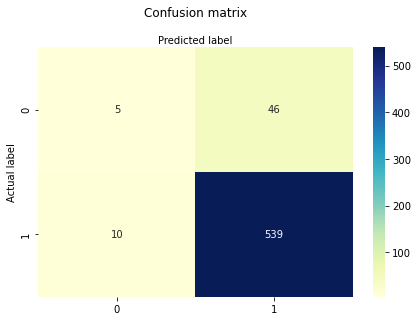

In [104]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confus_kn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [105]:
TP = confus_kn[1, 1]
TN = confus_kn[0, 0]
FP = confus_kn[0, 1]
FN = confus_kn[1, 0]

In [106]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP) )
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 5 False Negative = 10 True Positive = 539 False Positive  = 46


In [107]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_kn))
print("Precision:",metrics.precision_score(y_test, y_pred_kn))
print("Recall:",metrics.recall_score(y_test, y_pred_kn))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_kn)
print('F1 score = {}'.format(f1))

y_pred_kn_proba = knclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_kn_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.9066666666666666
Precision: 0.9213675213675213
Recall: 0.9817850637522769
FPR = 0.9019607843137255
F1 score = 0.9506172839506173
AUC = 0.6061645058752099


+ *Obtenim les probabilitats de y_pred per dibuixar la curva ROC*

  *I el valor associat de AUC (area under the curve)*

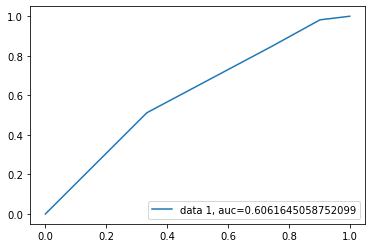

In [108]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_kn_proba)
auc = metrics.roc_auc_score(y_test, y_pred_kn_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

+ *4.- KN NEAREST NEIGHBORS - amb n_neighbors = 5 i p = 1*

  *p és la potència del paràmetre per per "Minkowski metric*"
  
  *Quan p = 1 és equivalent a "manhattan_distance.Per defecte p= 2, que és equivalent a "Euclidean distance"*

In [109]:
knclassif = KNeighborsClassifier(n_neighbors = 5, p = 1)
knclassif.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [110]:
y_pred_kn = knclassif.predict(X_test)

In [111]:
confus_kn = metrics.confusion_matrix(y_test, y_pred_kn)
print(confus_kn)

[[  5  46]
 [  8 541]]


Text(0.5, 257.44, 'Predicted label')

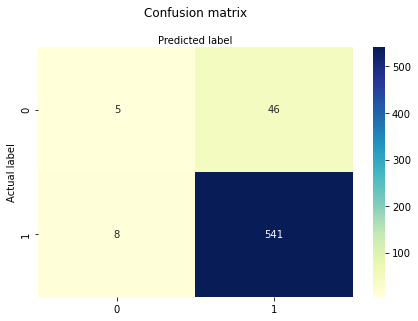

In [112]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confus_kn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [113]:
TP = confus_kn[1, 1]
TN = confus_kn[0, 0]
FP = confus_kn[0, 1]
FN = confus_kn[1, 0]

In [114]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP) )
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 5 False Negative = 8 True Positive = 541 False Positive  = 46


In [115]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_kn))
print("Precision:",metrics.precision_score(y_test, y_pred_kn))
print("Recall:",metrics.recall_score(y_test, y_pred_kn))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y_test, y_pred_kn)
print('F1 score = {}'.format(f1))

y_pred_kn_proba = knclassif.predict_proba(X_test)[::,1]
auc = metrics.roc_auc_score(y_test, y_pred_kn_proba)
print('AUC = {}'.format(auc))

Accuracy: 0.91
Precision: 0.9216354344122658
Recall: 0.9854280510018215
FPR = 0.9019607843137255
F1 score = 0.9524647887323944
AUC = 0.637022750812529


+ *Obtenim les probabilitats de y_pred per dibuixar la curva ROC*

  *I el valor associat de AUC (area under the curve)*

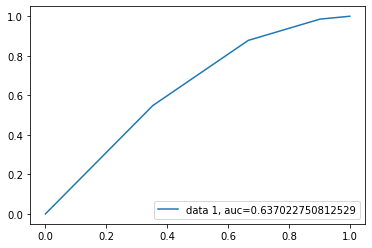

In [116]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_kn_proba)
auc = metrics.roc_auc_score(y_test, y_pred_kn_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### RESUM COMPARATIU KN NEAREST NEIGHBORS :

+ KN nearest neighbors (all parameters by Default):

True Negative = 4 False Negative = 5 True Positive = 544 False Positive  = 47

Accuracy: 0.9133333333333333

Precision: 0.9204737732656514

Recall: 0.9908925318761385

FPR = 0.9215686274509803

F1 score = 0.9543859649122807

AUC = 0.6126647380263581

+ KN nearest neighbors (amb n_neighbors = 6).

True Negative = 5 False Negative = 10 True Positive = 539 False Positive  = 46

Accuracy: 0.9066666666666666

Precision: 0.9213675213675213

Recall: 0.9817850637522769

FPR = 0.9019607843137255

F1 score = 0.9506172839506173

AUC = 0.6061645058752099


+ KN nearest neighbors (amb n_neighbors = 6 i p = 1)

True Negative = 5 False Negative = 8 True Positive = 541 False Positive  = 46

Accuracy: 0.91

Precision: 0.9216354344122658

Recall: 0.9854280510018215

FPR = 0.9019607843137255

F1 score = 0.9524647887323944

AUC = 0.637022750812529


Amb els successius tunnings han aconseguit millorar el valor de AUC.

Podem dir que el KN nearest neighbors Classifier, no és potser el més adequat per aquest exercici.Potser quan fem enginyeria de variables en l'exercici 5, podrem millorar el seu rendiment.


### *Exercici 4*

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (cross-validation).

  ### DECISION TREE
  
  *Començo reiniciant la divisió del Data set entre variables independents i variable target*

  *Per fer cross_validation*

In [117]:
X = retards2_df.drop("ArrDelay", 1)
y = retards2_df["ArrDelay"]

In [118]:
dtclassif = DecisionTreeClassifier()

In [119]:
from sklearn.model_selection import cross_val_score

In [120]:
scores = cross_val_score(dtclassif, X, y, cv = 5)
scores

array([0.875, 0.855, 0.87 , 0.88 , 0.865])

In [121]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.87 (+/- 0.01)


In [122]:
from sklearn.model_selection import cross_val_predict

In [123]:
y_predicted = cross_val_predict(dtclassif, X, y, cv = 5)

In [124]:
y_predicted.shape

(2000,)

In [125]:
metrics.accuracy_score(y, y_predicted)

0.874

In [126]:
confusion = metrics.confusion_matrix(y, y_predicted)
print(confusion)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[  99  113]
 [ 139 1649]]


In [127]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y, y_predicted))

0.874
0.874


In [128]:
classification_error = (FP + FN) / float(TP + TN + FP + FN) # overall, how often is the classifier incorrect?

print(classification_error)
print(1 - metrics.accuracy_score(y, y_predicted))

0.126
0.126


In [129]:
import seaborn as sns

<AxesSubplot:>

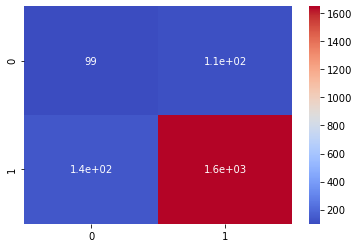

In [130]:
sns.heatmap(confusion, annot=True, cmap = 'coolwarm')

+ *El gràfic em dona els valors de True Positive en notació científica*

  *El visualitzo amb un codi alternatiu més complert*

  

Text(0.5, 257.44, 'Predicted label')

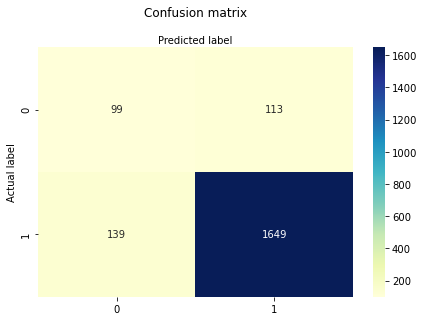

In [131]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

 *Faig un print dels valors de cada posició de la confusion matrix ("confusion")*

In [132]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP))
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 99 False Negative = 139 True Positive = 1649 False Positive  = 113


In [133]:
print("Accuracy:",metrics.accuracy_score(y, y_predicted))

print("Precision:",metrics.precision_score(y, y_predicted))

print("Recall:",metrics.recall_score(y, y_predicted))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y, y_predicted)
print('F1 score = {}'.format(f1))



Accuracy: 0.874
Precision: 0.9358683314415437
Recall: 0.9222595078299777
FPR = 0.5330188679245284
F1 score = 0.9290140845070424


### COMPARATIVA DECISION TREE CLASIFIER - TRAIN&TEST / CROSS VALIDATION

+ Cross Validation:

Accuracy: 0.874

Precision: 0.9358683314415437

Recall: 0.9222595078299777

FPR = 0.5330188679245284

F1 score = 0.9290140845070424

+ Train&test :

Accuracy: 0.905

Precision: 0.9555555555555556

Recall: 0.9398907103825137

FPR = 0.47058823529411764

F1 score = 0.9476584022038568

  ### LOGISTIC REGRESSION
  

In [134]:

from sklearn.linear_model import LogisticRegression


lgrclassif = LogisticRegression()


In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
scores = cross_val_score(lgrclassif, X, y, cv = 3)
scores

C:\Users\Enric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Enric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.94302849, 0.96851574, 0.96396396])

In [137]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.96 (+/- 0.01)


In [138]:
from sklearn.model_selection import cross_val_predict

In [139]:
y_predicted = cross_val_predict(dtclassif, X, y, cv = 5)

In [140]:
y_predicted.shape

(2000,)

In [141]:
metrics.accuracy_score(y, y_predicted)

0.872

In [142]:

cnf_matrix = metrics.confusion_matrix(y, y_predicted)
print(cnf_matrix)

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 101  111]
 [ 145 1643]]


Text(0.5, 257.44, 'Predicted label')

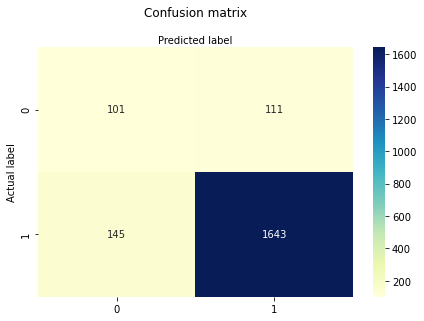

In [143]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [144]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP))
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 99 False Negative = 139 True Positive = 1649 False Positive  = 113


In [145]:
print("Accuracy:",metrics.accuracy_score(y, y_predicted))

print("Precision:",metrics.precision_score(y, y_predicted))

print("Recall:",metrics.recall_score(y, y_predicted))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y, y_predicted)
print('F1 score = {}'.format(f1))



Accuracy: 0.872
Precision: 0.9367160775370581
Recall: 0.918903803131991
FPR = 0.5330188679245284
F1 score = 0.9277244494635798


### COMPARATIVA LOGISTIC REGRESSION - TRAIN&TEST / CROSS VALIDATION

+ Cross Validation:

Accuracy: 0.872

Precision: 0.9367160775370581

Recall: 0.918903803131991

FPR = 0.5330188679245284

F1 score = 0.9277244494635798

+ Train&test :

Accuracy: 0.9733333333333334

Precision: 0.9854280510018215

Recall: 0.9854280510018215

FPR = 0.1568627450980392

F1 score = 0.9854280510018215

AUC = 0.9928568877459909

 ### K NEAREST NEIGHBORS
  

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knclassif = KNeighborsClassifier(n_neighbors=5)

In [147]:
from sklearn.model_selection import cross_val_score

In [148]:
scores = cross_val_score(knclassif, X, y, cv = 5)
scores

array([0.895 , 0.89  , 0.8825, 0.8825, 0.885 ])

In [149]:
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.89 (+/- 0.00)


In [150]:
from sklearn.model_selection import cross_val_predict

In [151]:
y_predicted = cross_val_predict(knclassif, X, y, cv = 5)

In [152]:
y_predicted.shape

(2000,)

In [153]:
metrics.accuracy_score(y, y_predicted)

0.887

In [154]:
confus_kn = metrics.confusion_matrix(y, y_predicted)
print(confus_kn)

TP = confus_kn[1, 1]
TN = confus_kn[0, 0]
FP = confus_kn[0, 1]
FN = confus_kn[1, 0]

[[   4  208]
 [  18 1770]]


In [155]:
print(TP)

1770


Text(0.5, 257.44, 'Predicted label')

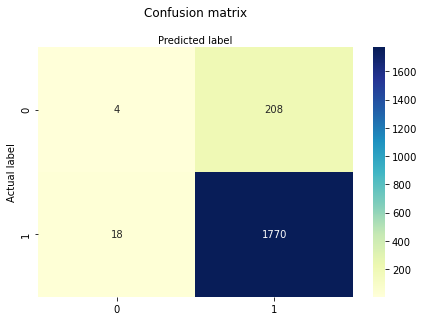

In [156]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confus_kn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [157]:
print('True Negative = {}'.format (TN), 'False Negative = {}'.format (FN), 'True Positive = {}'.format (TP), 
      'False Positive  = {}'.format (FP))
# print('False Negative = {}'.format (FN))
# print('True Positive = {}'.format (TP))
# print('False Positive  = {}'.format (FP))

True Negative = 4 False Negative = 18 True Positive = 1770 False Positive  = 208


In [158]:
print("Accuracy:",metrics.accuracy_score(y, y_predicted))

print("Precision:",metrics.precision_score(y, y_predicted))

print("Recall:",metrics.recall_score(y, y_predicted))

false_positive_rate = FP / float(TN + FP) # When actual value is negative, how often the predict is INcorrect ?
print('FPR = {}'.format(false_positive_rate))

f1 = metrics.f1_score(y, y_predicted)
print('F1 score = {}'.format(f1))



Accuracy: 0.887
Precision: 0.8948432760364005
Recall: 0.9899328859060402
FPR = 0.9811320754716981
F1 score = 0.9399893786510886


### COMPARATIVA K NEAREST NEIGHBORS - TRAIN&TEST / CROSS VALIDATION

+ Cross Validation:  

Accuracy: 0.887

Precision: 0.8948432760364005

Recall: 0.9899328859060402

FPR = 0.9811320754716981

F1 score = 0.9399893786510886


+ Train&test :  

Accuracy: 0.9133333333333333
Precision: 0.9204737732656514
Recall: 0.9908925318761385
FPR = 0.9215686274509803
F1 score = 0.9543859649122807